# Web Surfing data analysis.

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
df=pd.read_csv(r"C:\Users\Barry\Desktop\projects\web usage analysis\web_usage.csv")

In [3]:
df.head()

,Unnamed: 0,Hashed_ui,Country,Carriername,Domain,TimeStamp,Device,Screen_width,Screen_Height,DomainCategory,Installation_day,Pageviews
0,0,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'admarvel_carrier_Sprint_USA',b'facebook.com',20130801.0,b'Android_VM670',320.0,407.0,b'Social Networking',20110618.0,18.0
1,1,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'admarvel_carrier_Sprint_USA',b'facebook.com',20130801.0,b'Android_VM670',320.0,344.0,b'Social Networking',20110618.0,4.0
2,2,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'admarvel_carrier_Sprint_USA',b'craigslist.org',20130801.0,b'Android_VM670',320.0,407.0,b'Shopping',20110618.0,4.0
3,3,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'admarvel_carrier_Sprint_USA',b'craigslist.org',20130801.0,b'Android_VM670',320.0,344.0,b'Shopping',20110618.0,1.0
4,4,b'00003ef7dedc0a4f08ca0dd337ca919e0a88404f2da9...,b'Valrico',b'mcc_mnc_carrier_AT&T_AT&T_Mobility_US',b'phapit.com',20130801.0,b'Samsung_SGH-T989',480.0,594.0,b'Adult',20130801.0,6.0


for our analysis purpose we only need following attributes(Hashed_ui, Country, Domain, Device, Screen_width, Screen_Height, 
DomainCategory, Installation_Day, and Pageviews)

In [4]:
df=df.drop(columns=['Unnamed: 0','Carriername','TimeStamp']) #drop unwanted features which has no usefull information for us

In [5]:
df.head()

,Hashed_ui,Country,Domain,Device,Screen_width,Screen_Height,DomainCategory,Installation_day,Pageviews
0,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'facebook.com',b'Android_VM670',320.0,407.0,b'Social Networking',20110618.0,18.0
1,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'facebook.com',b'Android_VM670',320.0,344.0,b'Social Networking',20110618.0,4.0
2,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'craigslist.org',b'Android_VM670',320.0,407.0,b'Shopping',20110618.0,4.0
3,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'craigslist.org',b'Android_VM670',320.0,344.0,b'Shopping',20110618.0,1.0
4,b'00003ef7dedc0a4f08ca0dd337ca919e0a88404f2da9...,b'Valrico',b'phapit.com',b'Samsung_SGH-T989',480.0,594.0,b'Adult',20130801.0,6.0


Data cleaning

In [6]:
df.isnull().sum() #check for null values

Hashed_ui            0
Country              0
Domain              19
Device               0
Screen_width        21
Screen_Height       21
DomainCategory       0
Installation_day     0
Pageviews            0
dtype: int64

In [7]:
#Check satatistics of data
from skimpy import skim 
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean      ┃ sd    ┃ p0        ┃ p25      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Screen_width       │  21 │  0.21 │       400 │   180 │         0 │      320 │      480 │     1900 │  ▂█▁   │  │
│ │ Screen_Height      │  21 │  0.21 │       410 │   240 │         0 │      220 │      590 │     1800 │  ▆█▂▁  │  │
│ │ Installation_day   │   0 │     0 │  20000000 │  5900 │  20000000 │ 20000000 │ 20000000 │ 20000000 │    ▂ █ │  │
│ │ Pageviews          │   0 │     0 │        21 │    87 │         1 │        1 │        9 │     1900 │   █    │  │
│ └────────────────────┴─────┴───────┴───────────┴───────┴───────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Hashed_ui                     │      0 │          0 │                           1 │                  10000 │  │
│ │ Country                       │      0 │          0 │                           1 │                  10000 │  │
│ │ Domain                        │     19 │       0.19 │                           1 │                  10000 │  │
│ │ Device                        │      0 │          0 │                           1 │                  10000 │  │
│ │ DomainCategory                │      0 │          0 │                           1 │                  10000 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
#Impute the missing values with appropriate central measure values

df['Domain'].fillna(b'facebook.com',inplace=True)
df['Screen_width'].fillna(df['Screen_width'].mean(),inplace=True)
df['Screen_Height'].fillna(df['Screen_Height'].mean(),inplace=True)

In [9]:
df.isnull().sum()

Hashed_ui           0
Country             0
Domain              0
Device              0
Screen_width        0
Screen_Height       0
DomainCategory      0
Installation_day    0
Pageviews           0
dtype: int64

In [10]:
df.shape

(10000, 9)

In [11]:
# cross checking
df.dropna(inplace=True)          #drop null values
df.drop_duplicates(inplace=True) #droping duplicates
df.shape

(9989, 9)

In [12]:
df.head(3)

,Hashed_ui,Country,Domain,Device,Screen_width,Screen_Height,DomainCategory,Installation_day,Pageviews
0,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'facebook.com',b'Android_VM670',320.0,407.0,b'Social Networking',20110618.0,18.0
1,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'facebook.com',b'Android_VM670',320.0,344.0,b'Social Networking',20110618.0,4.0
2,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'craigslist.org',b'Android_VM670',320.0,407.0,b'Shopping',20110618.0,4.0


In [13]:
#lets check for incorrect data /errors

In [14]:
for i in range(9):
    print(df.iloc[:,i].value_counts())

b'00d10f2539a2efe2210ec4a7e597be7e31725ed2630e0e60904066415130d91c'    65
b'004715fd0605c070d296d09ffe83edd6381c4ce7675f2b1d338e9cf0b34c98f5'    48
b'01c6b80cd13098f693da2e07a0b370782f16d550505f5c6872d9a0a5cda53649'    43
b'013712d547f7856b37128f3377589a5f4b41725081b946073c7bf1dfa5cc580d'    38
b'009420af5e0402ca4888f48a5343dff049a84992361088101629e767a14ea28e'    38
                                                                       ..
b'006a0e36d47c05527b0ff869edfd7939ed4eb0b84f44f1a3324a76741ad16b3c'     1
b'01d996683f253c0edc8b9b870053d8fa3d57851d8cf8cef11253fa84f2cab7eb'     1
b'01d8d4245b17314e3ea746b2a9c7427c1351c876354a5243107c0a362c46066e'     1
b'00be47b54c859c5434549678f5266a748017c5eb5223537b22f9ae1e06523918'     1
b'006d63fae6e1a666352d9e8983264471a58c57357db2489d3673f36116436fb6'     1
Name: Hashed_ui, Length: 2840, dtype: int64
b'unknown'         3634
b'Apo'              290
b'Chicago'          261
b'Houston'          227
b'Brooklyn'         185
                   ...

In [15]:
df.nunique().sum()

8448

In [16]:
user_count=df.Device.nunique() # no of unique users before deleting the missing or b"unkwoun" data
user_count

533

Delete b'unknown data' from all categorical column

In [17]:
df=df.loc[df['Country'] !="b'unknown'",:]
df=df.loc[df['Device'] !="b'unknown'",:]

Shape of data after removing all unkown and missing data

In [18]:
print(df.shape)

(5855, 9)


unique User count after removing unkwon values

In [19]:
new_user_count=df.Device.nunique()
new_user_count

463

Percentage decrease in unique users after data cleaning

In [20]:
Dec_unique_users =user_count-new_user_count
per_dec_unique_users=((user_count-new_user_count)/user_count)*100
print(f"Decrease in number of unique users => {Dec_unique_users}  &  %percentage decrease in unique users => {per_dec_unique_users:.2f}")

Decrease in number of unique users => 70  &  %percentage decrease in unique users => 13.13


In [21]:
#Number of rows in resultant data
df.shape[0]

5855

In [22]:
df.head(4)

,Hashed_ui,Country,Domain,Device,Screen_width,Screen_Height,DomainCategory,Installation_day,Pageviews
0,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'facebook.com',b'Android_VM670',320.0,407.0,b'Social Networking',20110618.0,18.0
1,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'facebook.com',b'Android_VM670',320.0,344.0,b'Social Networking',20110618.0,4.0
2,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'craigslist.org',b'Android_VM670',320.0,407.0,b'Shopping',20110618.0,4.0
3,b'00000bd2f1c10e207b1af81b702fc54c70a39ba43734...,b'Markham',b'craigslist.org',b'Android_VM670',320.0,344.0,b'Shopping',20110618.0,1.0


In [23]:
#Formating the columns 
df['Hashed_ui']=df['Hashed_ui'].map(lambda x: x.replace("b",""))
df['Hashed_ui']=df['Hashed_ui'].map(lambda x: x.replace("'",""))

df['Country']=df['Country'].map(lambda x: x.replace("b",""))
df['Country']=df['Country'].map(lambda x: x.replace("'",""))

df['DomainCategory']=df['DomainCategory'].map(lambda x: x.replace("b",""))
df['DomainCategory']=df['DomainCategory'].map(lambda x: x.replace("'",""))

df['Device']=df['Device'].map(lambda x: x.replace("b",""))
df['Device']=df['Device'].map(lambda x: x.replace("'",""))

df['Domain']=df['Domain'].map(lambda x: str(x))  # here object is incorporated with byte type data ,
#so converting every row into string before applying methods

df['Domain']=df['Domain'].map(lambda x: x.replace("b",""))
df['Domain']=df['Domain'].map(lambda x: x.replace("'",""))

Final Data

In [24]:
print(df.shape)
df.head(3)

(5855, 9)


,Hashed_ui,Country,Domain,Device,Screen_width,Screen_Height,DomainCategory,Installation_day,Pageviews
0,00000d2f1c10e2071af81702fc54c70a39a437347f8e46...,Markham,faceook.com,Android_VM670,320.0,407.0,Social Networking,20110618.0,18.0
1,00000d2f1c10e2071af81702fc54c70a39a437347f8e46...,Markham,faceook.com,Android_VM670,320.0,344.0,Social Networking,20110618.0,4.0
2,00000d2f1c10e2071af81702fc54c70a39a437347f8e46...,Markham,craigslist.org,Android_VM670,320.0,407.0,Shopping,20110618.0,4.0


In [25]:
df.DomainCategory.value_counts()

Social Networking             1792
News                           811
Arts & Entertainment           567
Unclassified                   518
Adult                          422
Business                       356
Shopping                       293
Technology & Computing         236
Education                      232
Society                        133
Family & Parenting              87
Sports                          83
Search                          69
Travel                          53
Games                           39
Law, Government & Politics      34
Personal Finance                26
Health & Fitness                25
Email                           23
Home & Garden                   22
Careers                         10
Religion & Spirituality          5
Automotive                       5
Malicious                        5
Style & Fashion                  4
Hoies & Interests                2
Real Estate                      2
Food & Drink                     1
Name: DomainCategory

Data in DomainCategory belonging to unclassified data.

In [26]:
#checking percentile corrupt values

Unclassified_data=df.loc[df.DomainCategory=="Unclassified"].shape[0]
fra_unclassified=(Unclassified_data/df.shape[0])*100
print(f"fraction of unclassifies data in DomainCategory column is = {fra_unclassified}")

fraction of unclassifies data in DomainCategory column is = 8.847139197267293


In [27]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5855   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean      ┃ sd    ┃ p0        ┃ p25      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Screen_width       │   0 │     0 │       430 │   200 │         0 │      320 │      480 │     1900 │  ▂█▁   │  │
│ │ Screen_Height      │   0 │     0 │       460 │   250 │         0 │      320 │      590 │     1800 │  ▃█▂▁  │  │
│ │ Installation_day   │   0 │     0 │  20000000 │  5600 │  20000000 │ 20000000 │ 20000000 │ 20000000 │    ▂ █ │  │
│ │ Pageviews          │   0 │     0 │        23 │    94 │         1 │        1 │        9 │     1900 │   █    │  │
│ └────────────────────┴─────┴───────┴───────────┴───────┴───────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Hashed_ui                     │      0 │          0 │                           1 │                   5900 │  │
│ │ Country                       │      0 │          0 │                           1 │                   5900 │  │
│ │ Domain                        │      0 │          0 │                           1 │                   5900 │  │
│ │ Device                        │      0 │          0 │                           1 │                   5900 │  │
│ │ DomainCategory                │      0 │          0 │                           1 │                   5900 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Distribution of data

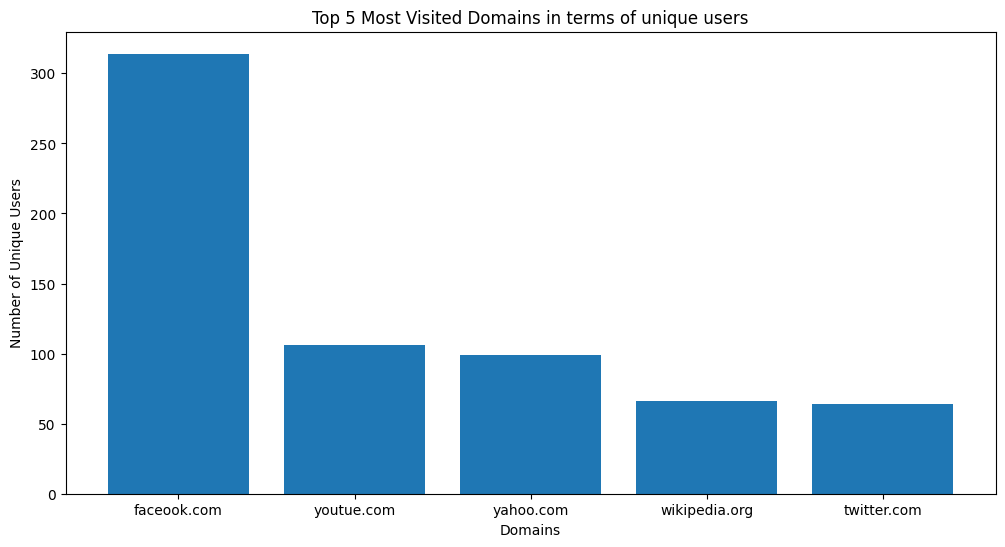

In [28]:
website_counts = df.groupby("Domain")["Device"].nunique()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)

#Most visited domains in terms of unique users
import matplotlib.pyplot as plt

k = 5
plt.figure(figsize=(12, 6))
plt.bar(website_counts_sorted.head(k).index, website_counts_sorted.head(k).values)

plt.xlabel("Domains")
plt.ylabel("Number of Unique Users")
plt.title(f"Top {k} Most Visited Domains in terms of unique users")

plt.show()

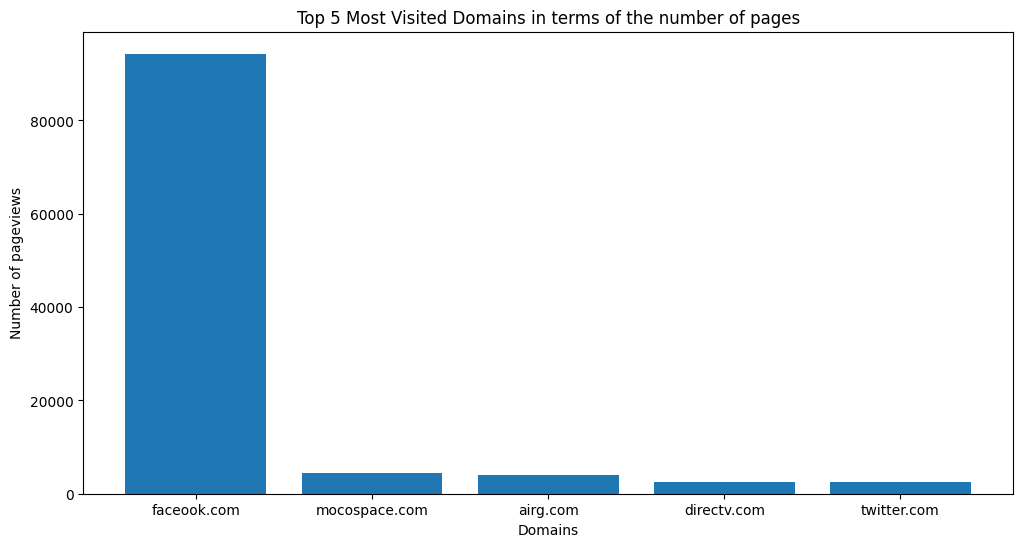

In [29]:
#Most visited domains in terms of the number of pages
website_counts = df.groupby("Domain")["Pageviews"].sum()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)

import matplotlib.pyplot as plt
k=5

plt.figure(figsize=(12, 6))
plt.bar(website_counts_sorted.head(k).index, website_counts_sorted.head(k).values)

plt.xlabel("Domains")
plt.ylabel("Number of pageviews")
plt.title(f"Top {k} Most Visited Domains in terms of the number of pages")

plt.show()

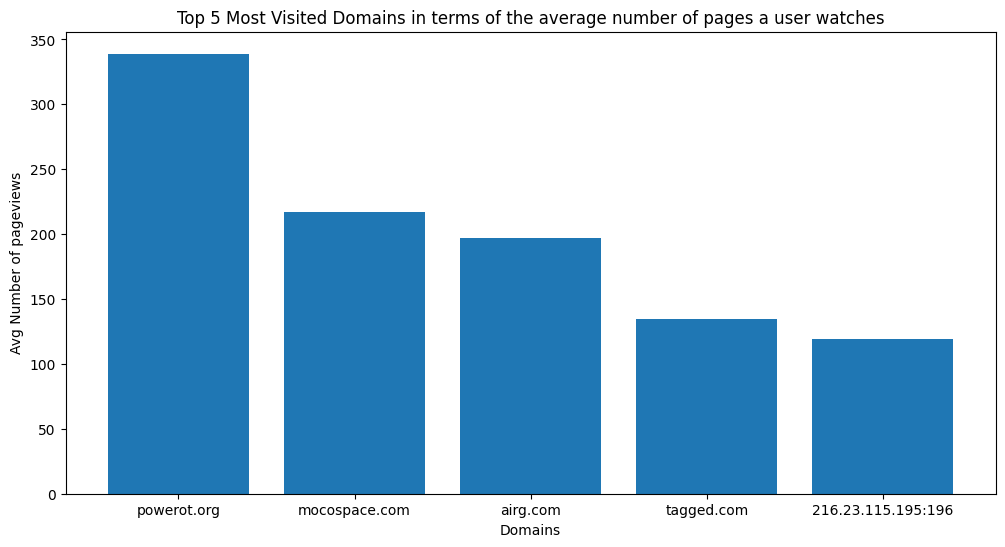

In [30]:
#Most visited domains in terms of the average number of pages a user watches
website_counts = df.groupby("Domain")["Pageviews"].mean()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)

import matplotlib.pyplot as plt
k=5

plt.figure(figsize=(12, 6))
plt.bar(website_counts_sorted.head(k).index, website_counts_sorted.head(k).values)
plt.xlabel("Domains")
plt.ylabel("Avg Number of pageviews")
plt.title(f"Top {k} Most Visited Domains in terms of the average number of pages a user watches")

plt.show()

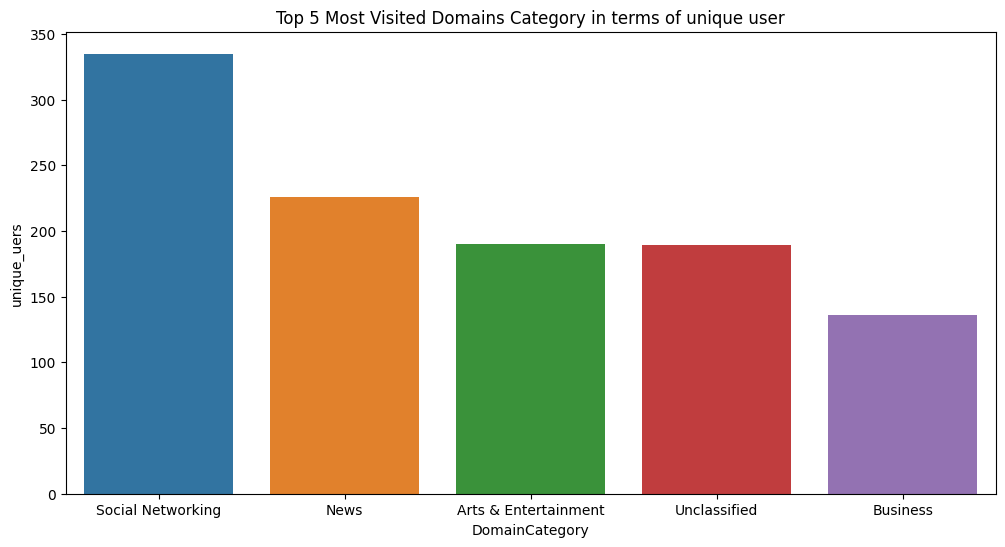

In [31]:
#Most visited domains in terms of the  unique user 
website_counts = df.groupby("DomainCategory")["Device"].nunique()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)

import matplotlib.pyplot as plt
k=5
plt.figure(figsize=(12, 6))
plt.xlabel("Domains Category")
plt.ylabel("unique_uers")
plt.title(f"Top {k} Most Visited Domains Category in terms of unique user")
sns.barplot(x=website_counts_sorted.head(5).index, y=website_counts_sorted.head(k).values)
plt.show()

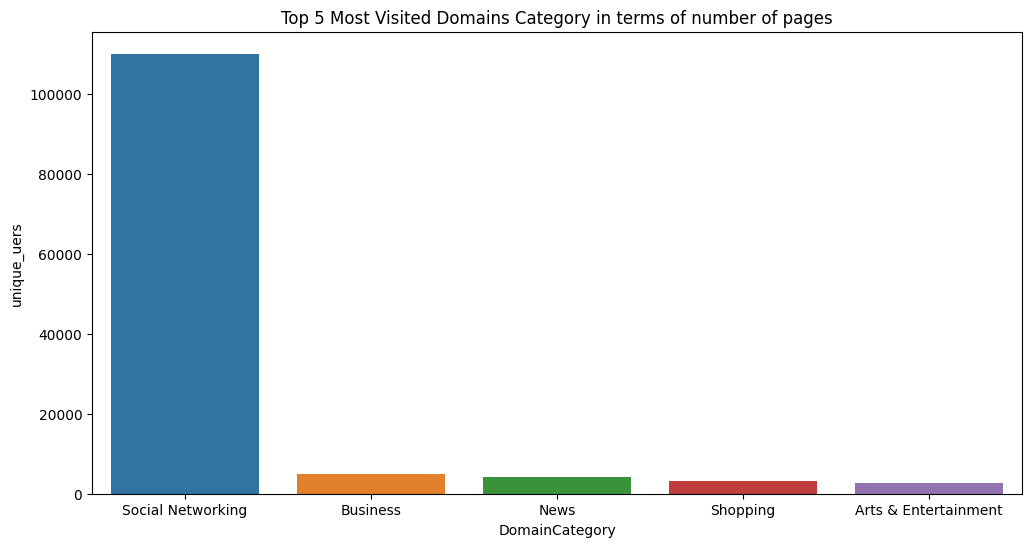

In [32]:
#Most visited domainsCategory in terms of the  unique number of pages 
website_counts = df.groupby("DomainCategory")["Pageviews"].sum()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)
k=5

plt.figure(figsize=(12, 6))
#plt.xticks(rotation=90)
plt.xlabel("Domains Category")
plt.ylabel("unique_uers")
plt.title(f"Top {k} Most Visited Domains Category in terms of number of pages")
sns.barplot(x=website_counts_sorted.head(k).index, y=website_counts_sorted.head(k).values)
plt.show()

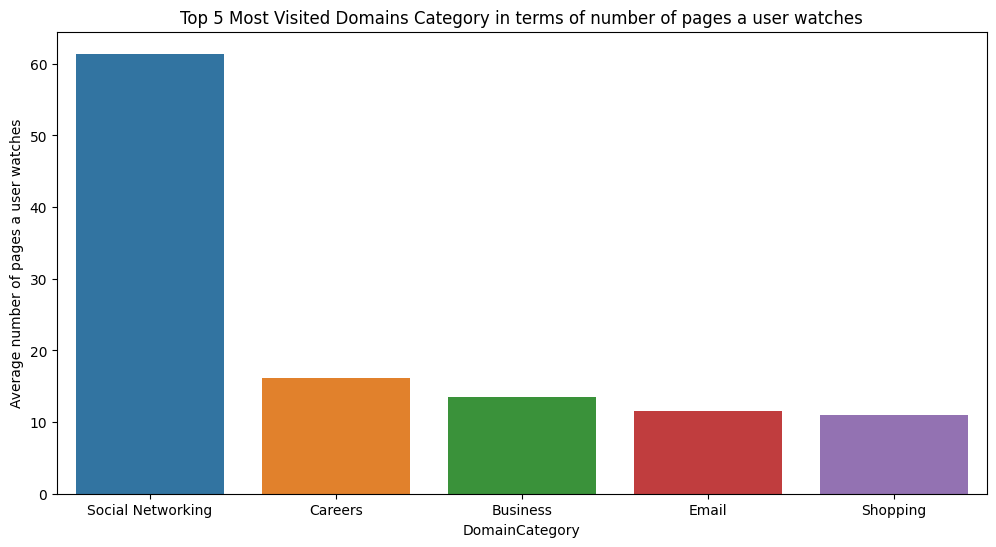

In [33]:
#Most visited domainsCategory in terms of the  unique number of pages 
website_counts = df.groupby("DomainCategory")["Pageviews"].mean()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)
k=5

plt.figure(figsize=(12, 6))
#plt.xticks(rotation=90)
plt.xlabel("Domains Category")
plt.ylabel("Average number of pages a user watches")
plt.title(f"Top {k} Most Visited Domains Category in terms of number of pages a user watches")
sns.barplot(x=website_counts_sorted.head(k).index, y=website_counts_sorted.head(k).values)
plt.show()

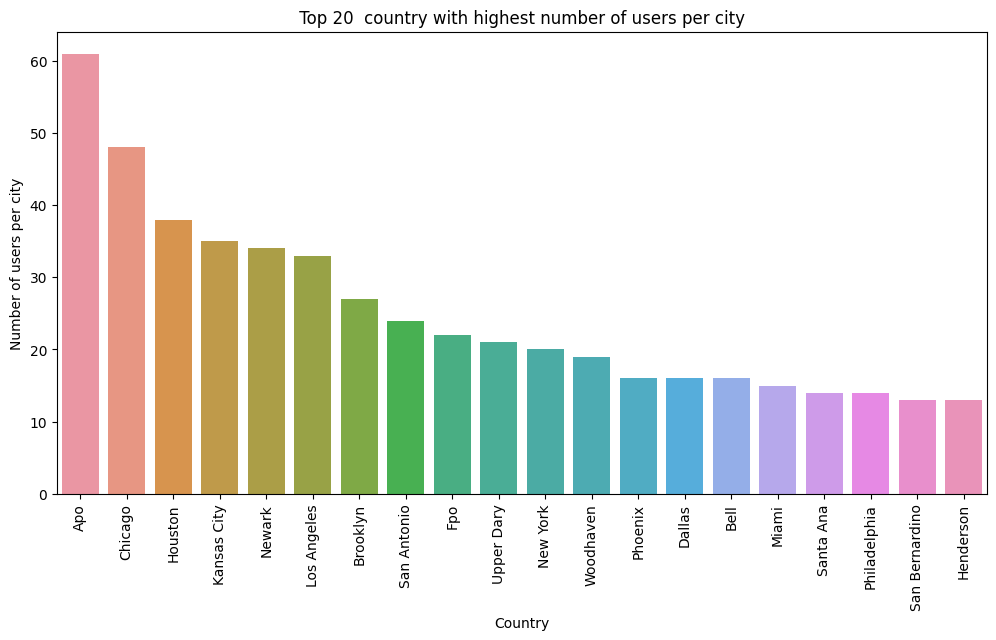

In [34]:
#Number of users per city
website_counts = df.groupby("Country")["Device"].nunique()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)
k=20

plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.ylabel("Number of users per city")
plt.title(f" Top {k}  country with highest number of users per city ")
sns.barplot(x=website_counts_sorted.head(k).index, y=website_counts_sorted.head(k).values)
plt.show()

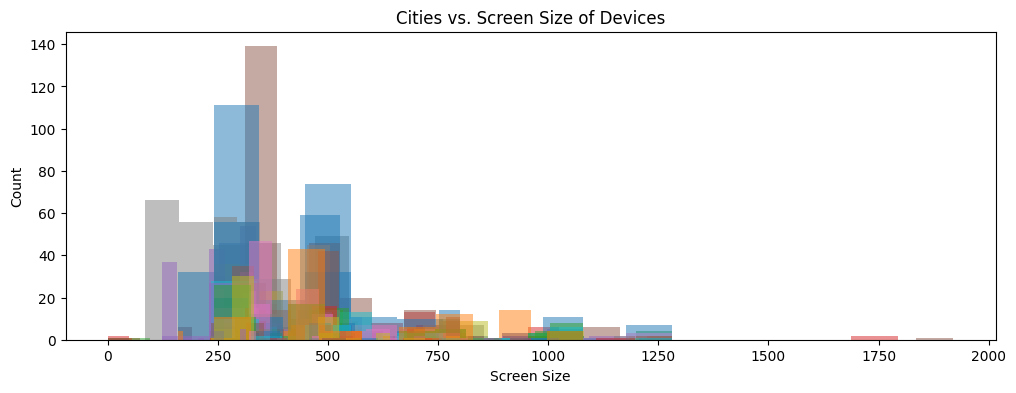

In [124]:
import matplotlib.pyplot as plt

# Group the data by city/country
by_country = df.groupby('Country')

# Create a histogram for each country
plt.figure(figsize=(12, 4))
for country, group in by_country:
    screen_sizes = group['Screen_width']
    plt.hist(screen_sizes, alpha=0.5, label=country)

# Set the axis labels and title
plt.xlabel('Screen Size')
plt.ylabel('Count')
plt.title('Cities vs. Screen Size of Devices')


# Show the plot
plt.show()


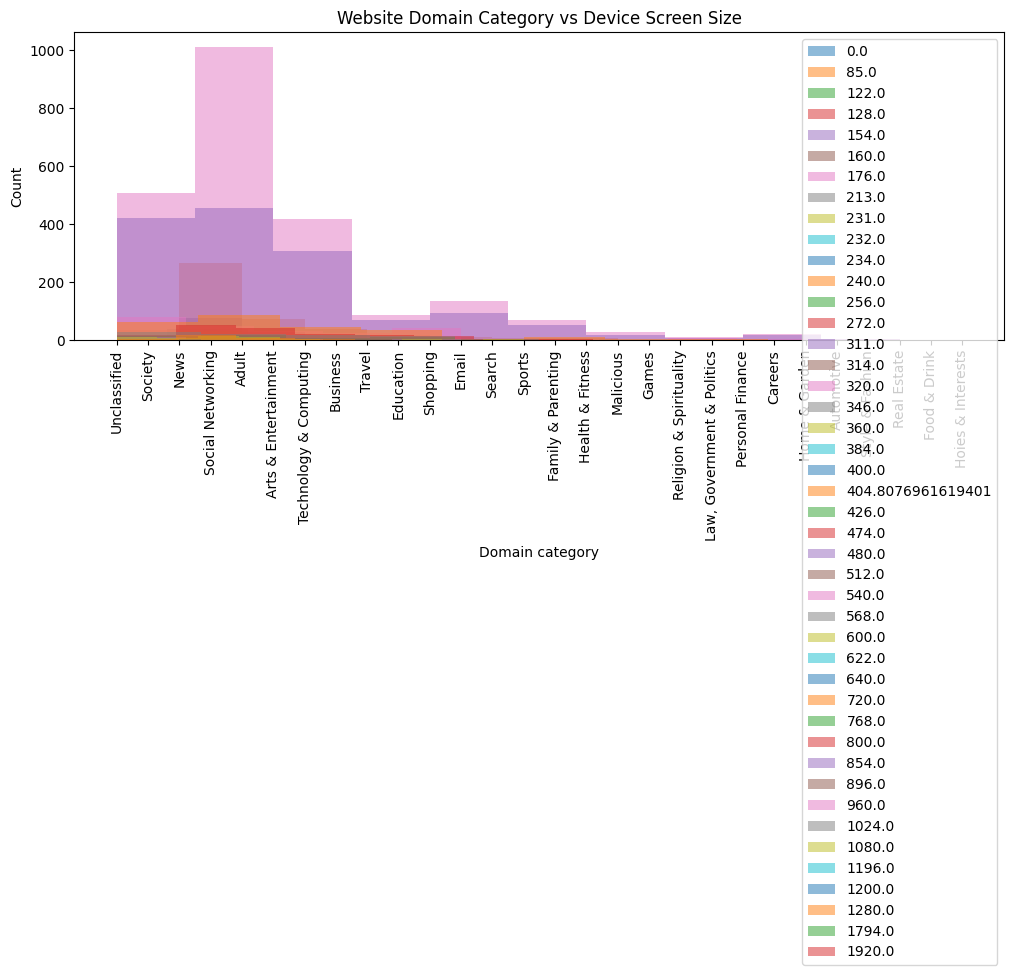

In [36]:
import matplotlib.pyplot as plt

# Group the data by screen size category
by_domain = df.groupby('Screen_width')

plt.figure(figsize=(12, 4))
plt.xticks(rotation=90)
# Create a histogram for each domain category
for domain, group in by_domain:
    screen_sizes = group['DomainCategory']
    plt.hist(screen_sizes, alpha=0.5, label=domain)

# Set the axis labels and title
plt.xlabel('Domain category')
plt.ylabel('Count')
plt.title('Website Domain Category vs Device Screen Size')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

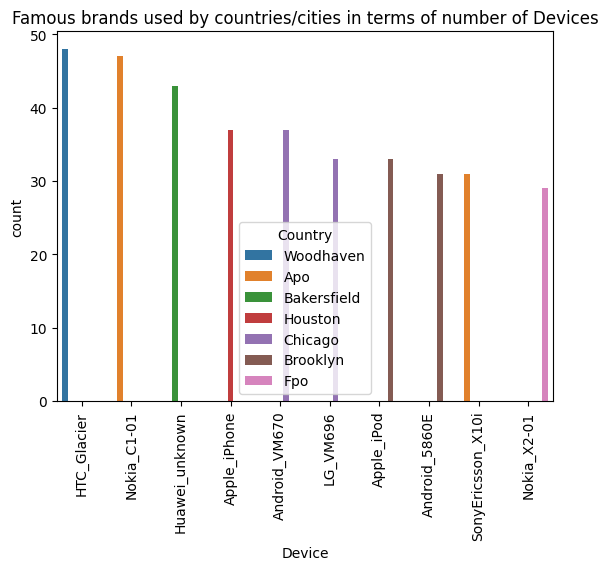

In [37]:
import matplotlib.pyplot as plt

# Group the data by country and device type
country_device_type = df.groupby(['Country', 'Device'])

# Get the total count of devices by country/cities and device type
count_by_country_device_type = country_device_type.size().reset_index(name='count')
count_by_country_device_type=count_by_country_device_type.sort_values(by="count",ascending=False)
count_by_country_device_type=count_by_country_device_type.head(10)
# displaying countries as legends
hues=count_by_country_device_type.iloc[:,0]
plt.title('Famous brands used by countries/cities in terms of number of Devices')
plt.xticks(rotation=90)

sns.barplot(x=count_by_country_device_type.iloc[:,1],y=count_by_country_device_type.iloc[:,2],hue=hues)
plt.show()

<Axes: title={'center': 'Market capture by Brands'}, xlabel='Devices', ylabel='Count'>

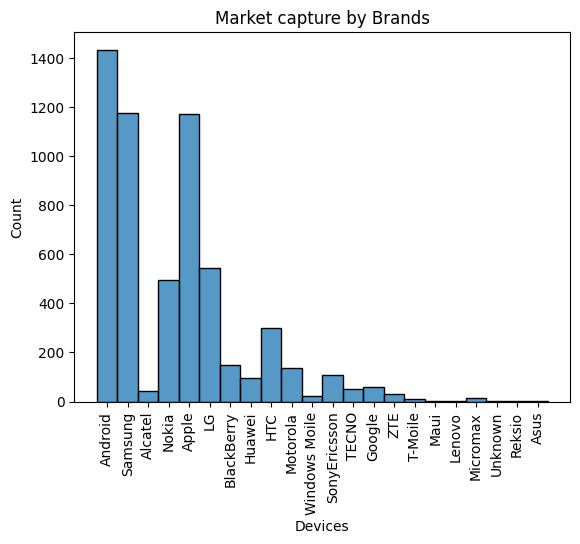

In [38]:
#market capture by famous brands
df2=df.Device.map(lambda x: x.split('_')[0])
df2
plt.xticks(rotation=90)
plt.title("Market capture by Brands")
plt.xlabel("Devices")
sns.histplot(df2)


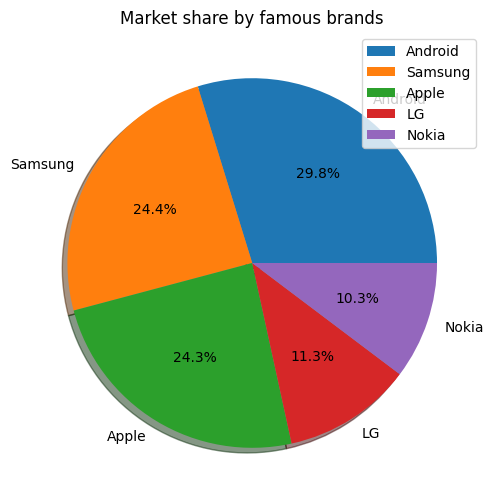

In [39]:
plt.figure(figsize=(12, 6))

plt.pie(df2.value_counts().head(5).values, labels =df2.value_counts().head(5).index, shadow = True, autopct='%.1f%%')
plt.legend(loc="upper right")
plt.title("Market share by famous brands")
plt.show() 

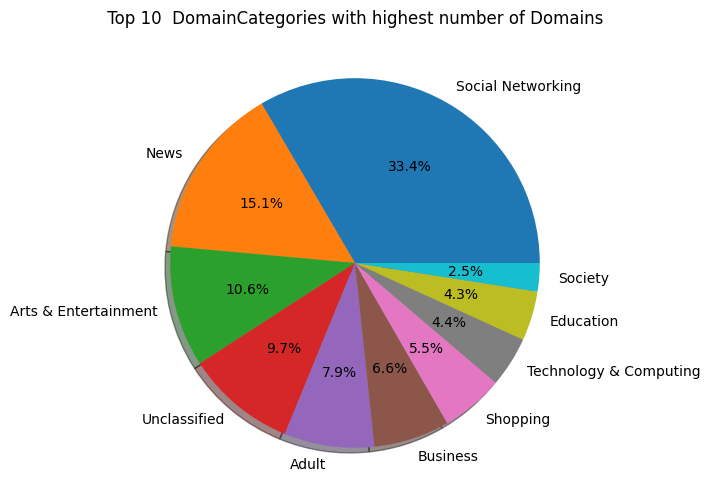

In [40]:
#domain categories based on the number of domains they consist of.
website_counts = df.groupby("DomainCategory")["Domain"].count()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)
k=10

plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)

plt.title(f" Top {k}  DomainCategories with highest number of Domains ")

plt.pie(website_counts_sorted.head(k).values, labels =website_counts_sorted.head(k).index , shadow = True, autopct='%1.1f%%')
plt.show() 

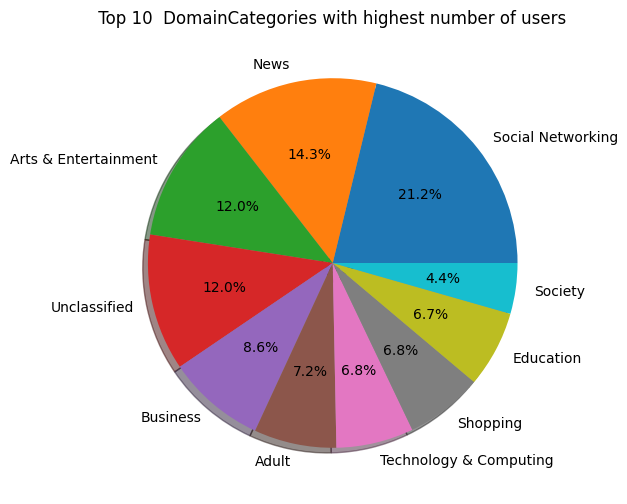

In [41]:
#domain categories based on the number of unique users .
website_counts = df.groupby("DomainCategory")["Device"].nunique()

#sort the counts in descending order
website_counts_sorted = website_counts.sort_values(ascending=False)
k=10

plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)

plt.title(f" Top {k}  DomainCategories with highest number of users ")

plt.pie(website_counts_sorted.head(k).values, labels =website_counts_sorted.head(k).index , shadow = True, autopct='%1.1f%%')
plt.show() 

How diverse are the users in terms of the domain categories they watch?

=> The one metric we can use to calculate how diverse are the users interms of the domain category they watch is "Category 
entropy "

=> steps to calculate "category entropy" are show below code snippet.


=>  A higher entropy value indicates greater diversity of categories, while a lower entropy value indicates more concentrated usage on a few categories.

In [42]:
#How diverse are the users interms of watching different domains

from scipy.stats import entropy

# count the number of users who visit each category
category_counts = df['DomainCategory'].value_counts()

# calculate the probability distribution across categories
category_probs = category_counts / category_counts.sum()
print(f"probability distribution across categories {category_probs}")
# calculate category entropy
category_entropy = entropy(category_probs, base=2)

print(f"Category entropy: {category_entropy:.2f}")
print("from entropy value we can say that Users are very diverse in terms of watching different Domains.")

probability distribution across categories Social Networking             0.306063
News                          0.138514
Arts & Entertainment          0.096840
Unclassified                  0.088471
Adult                         0.072075
Business                      0.060803
Shopping                      0.050043
Technology & Computing        0.040307
Education                     0.039624
Society                       0.022716
Family & Parenting            0.014859
Sports                        0.014176
Search                        0.011785
Travel                        0.009052
Games                         0.006661
Law, Government & Politics    0.005807
Personal Finance              0.004441
Health & Fitness              0.004270
Email                         0.003928
Home & Garden                 0.003757
Careers                       0.001708
Religion & Spirituality       0.000854
Automotive                    0.000854
Malicious                     0.000854
Style & Fashion      

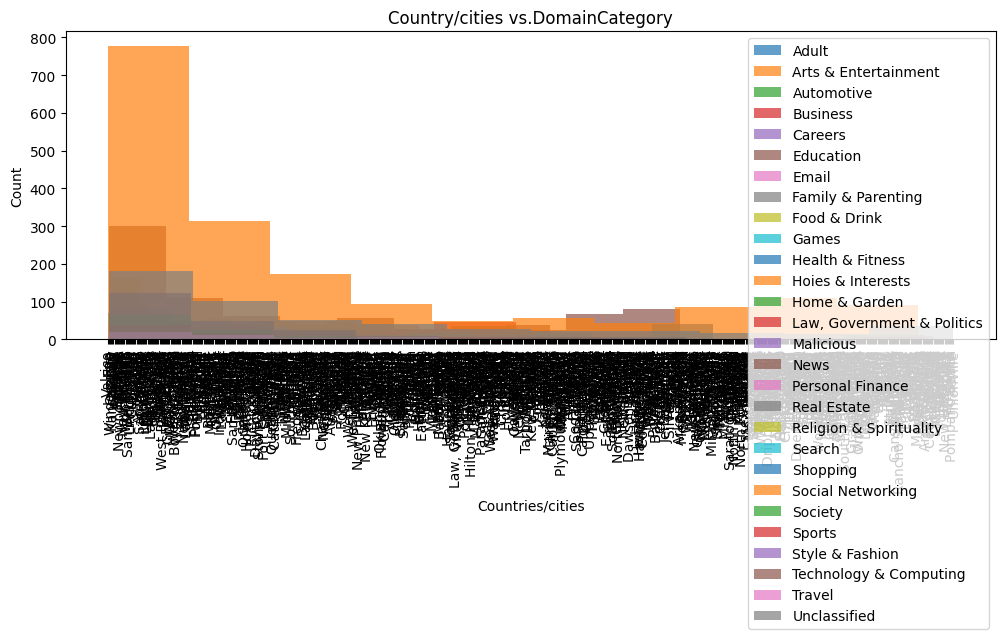

from Histogram we can say that overall countries are inclined towords Art & Entertainment, Social Networking and Education Domain


In [43]:
import matplotlib.pyplot as plt

# Group the data by DomainCategory
by_country = df.groupby('DomainCategory')

# Create a histogram for each DomainCategory
plt.figure(figsize=(12, 4))
for country, group in by_country:
    screen_sizes = group['Country']
    plt.hist(screen_sizes, alpha=0.7, label=country)

# Set the axis labels and title
plt.xticks(rotation=90)
plt.xlabel('Countries/cities')
plt.ylabel('Count')
plt.title('Country/cities vs.DomainCategory')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()
print("from Histogram we can say that overall countries are inclined towords Art & Entertainment, Social Networking and Education Domain")

In [44]:
#Based on the screen’s width and height, we can predict whether the user was using a 
#mobile, laptop, or iPad. Are users inclined towards using this web browser through a 
#particular device?


# define screen size thresholds for mobile, laptop, and iPad devices
mobile_thresh = (640, 480)
laptop_thresh = (1366, 768)
ipad_thresh = (1024, 1366)

# determine device type based on screen size
def get_device_type(width, height):
    if width < mobile_thresh[0] or height < mobile_thresh[1]:
        return 'mobile'
    elif width < laptop_thresh[0] or height < laptop_thresh[1]:
        return 'laptop'
    elif width < ipad_thresh[0] or height < ipad_thresh[1]:
        return 'iPad'
    else:
        return 'unknown'

# add device type column to DataFrame
df['device_type'] = df.apply(lambda x: get_device_type(x['Screen_width'], x['Screen_Height']), axis=1)

# calculate device usage counts and proportions
device_counts = df['device_type'].value_counts()
device_props = device_counts / device_counts.sum()

# print device usage proportions
print("Device usage proportions:")
print(device_props)

# perform chi-squared test for device preference
from scipy.stats import chi2_contingency

# create contingency table of device usage by browser preference
contingency_table = pd.crosstab(df['device_type'], df['Domain'])

# perform chi-squared test
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared test results:\nChi2 = {chi2:.2f}\np-value = {pval:.4f}")
print("""P value is less than 0.05 we can reject the null hypothesis that there is no association between device preference and browser
usage, and conclude that users are inclined towards using a particular device when accessing the web browser.""")

Device usage proportions:
mobile    0.906405
laptop    0.093083
iPad      0.000512
Name: device_type, dtype: float64

Chi-squared test results:
Chi2 = 4531.77
p-value = 0.0000
P value is less than 0.05 we can reject the null hypothesis that there is no association between device preference and browser
usage, and conclude that users are inclined towards using a particular device when accessing the web browser.


In [45]:
#average number of domain a user explore in a one surf
Avg_Domain_surf=df.Domain.nunique()//df.Device.nunique()
print(f"average number of domain visited by indivisual users in a one surf is:{Avg_Domain_surf}")

average number of domain visited by indivisual users in a one surf is:4


In [46]:
#10 most frequent pairs of domain explored consicutively
from collections import Counter

# create a list of consecutive domain pairs
domain_pairs = [(df['Domain'].iloc[i], df['Domain'].iloc[i+1]) for i in range(5855-1)]

# count the frequency of each domain pair
domain_pair_counts = Counter(domain_pairs)

# get the 10 most frequent domain pairs
top_domain_pairs = domain_pair_counts.most_common(10)

# print the results
for pair, count in top_domain_pairs:
    print(pair[0], '->', pair[1], ':', count)

faceook.com -> faceook.com : 685
faceook.com -> youtue.com : 63
faceook.com -> wikipedia.org : 46
twitter.com -> twitter.com : 43
faceook.com -> yahoo.com : 42
faceook.com -> akamaihd.net : 40
yahoo.com -> yahoo.com : 36
directv.com -> directv.com : 35
faceook.com -> logspot.com : 29
youtue.com -> youtue.com : 25


In [47]:
#10 most frequent pairs of domain category explored consicutively
from collections import Counter

# create a list of consecutive domain pairs
domain_pairs = [(df['DomainCategory'].iloc[i], df['DomainCategory'].iloc[i+1]) for i in range(5855-1)]

# count the frequency of each domain pair
domain_pair_counts = Counter(domain_pairs)

# get the 10 most frequent domain pairs
top_domain_pairs = domain_pair_counts.most_common(10)

# print the results
for pair, count in top_domain_pairs:
    print(pair[0], '->', pair[1], ':', count)

Social Networking -> Social Networking : 968
News -> News : 240
Social Networking -> Arts & Entertainment : 170
Social Networking -> News : 168
Adult -> Adult : 159
News -> Social Networking : 149
Arts & Entertainment -> Social Networking : 133
Unclassified -> Unclassified : 127
Arts & Entertainment -> Arts & Entertainment : 121
Unclassified -> Social Networking : 105


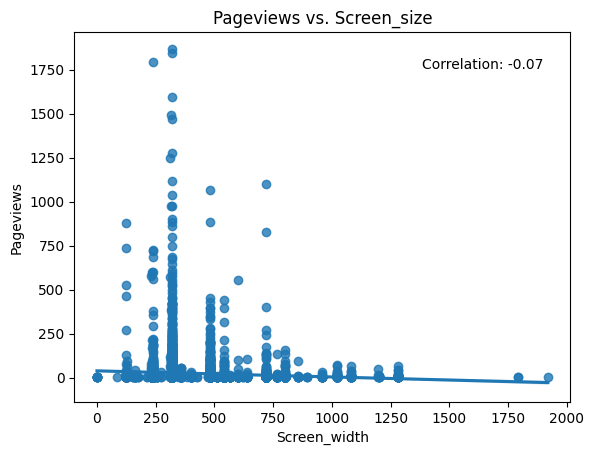

In [48]:
#co-relation between pageviews and screensize

plt.title("Pageviews vs. Screen_size")
sns.regplot(x='Screen_width', y='Pageviews', data=df)

# Display the correlation coefficient on the plot
corr = df['Screen_width'].corr(df['Pageviews'])
plt.text(0.7, 0.9, f"Correlation: {corr:.2f}", transform=plt.gca().transAxes)

plt.show()



In [49]:
df.device_type=df.device_type.map({'mobile':1,'laptop':2,'iPad':3})

In [50]:
df.device_type.unique()

array([1, 2, 3], dtype=int64)

In [51]:
df.head(3)

,Hashed_ui,Country,Domain,Device,Screen_width,Screen_Height,DomainCategory,Installation_day,Pageviews,device_type
0,00000d2f1c10e2071af81702fc54c70a39a437347f8e46...,Markham,faceook.com,Android_VM670,320.0,407.0,Social Networking,20110618.0,18.0,1
1,00000d2f1c10e2071af81702fc54c70a39a437347f8e46...,Markham,faceook.com,Android_VM670,320.0,344.0,Social Networking,20110618.0,4.0,1
2,00000d2f1c10e2071af81702fc54c70a39a437347f8e46...,Markham,craigslist.org,Android_VM670,320.0,407.0,Shopping,20110618.0,4.0,1


# Data Clustering based on  unique users

In [52]:
web_usage=df.copy()

In [53]:
web_usage=web_usage.drop(columns=['Hashed_ui','Country','Domain','Installation_day'])

D:\anaconda\envs\streamlit\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


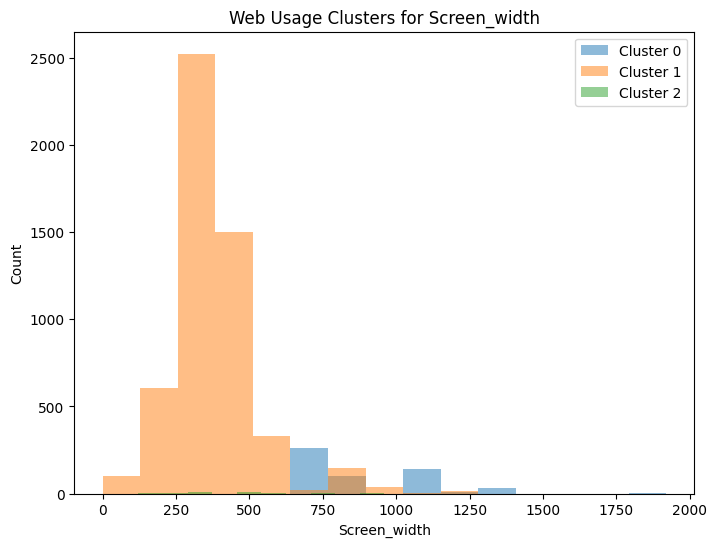

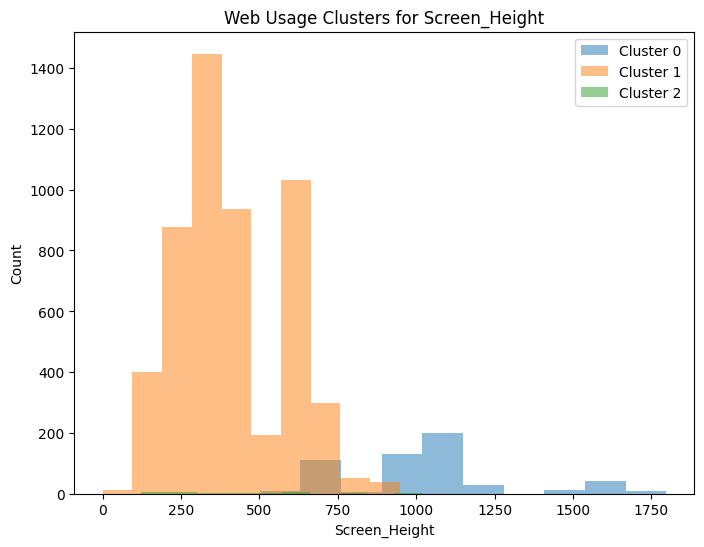

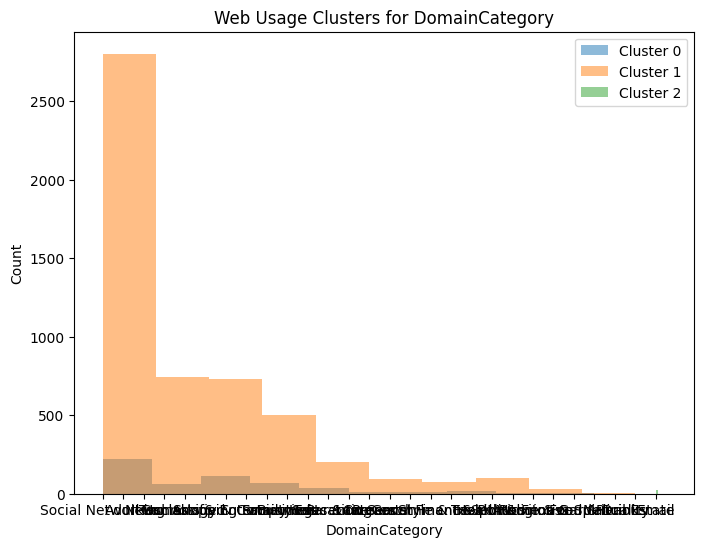

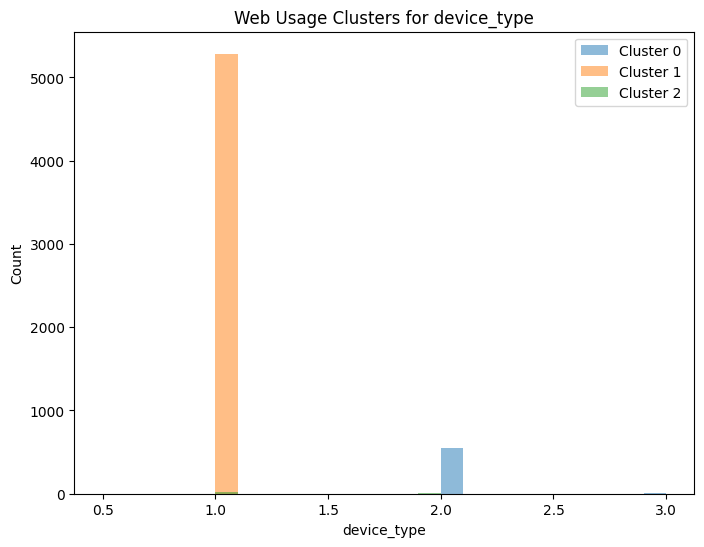

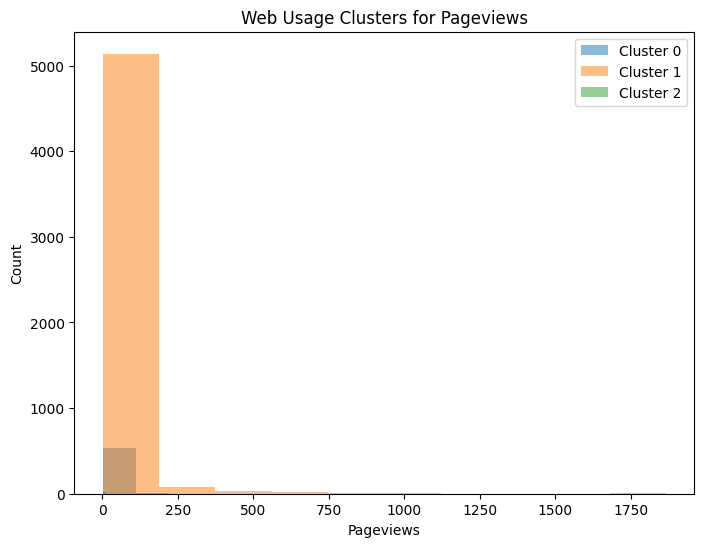

In [57]:

# Select the relevant features
features = ['Screen_width', 'Screen_Height', 'DomainCategory', 'device_type', 'Pageviews']
X = web_usage[features]

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['DomainCategory', 'device_type'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original data
web_usage['cluster'] = kmeans.labels_

# Plot the clusters for each feature
for feature in features:
    plt.figure(figsize=(8,6))
    for cluster in range(kmeans.n_clusters):
        cluster_data = web_usage[web_usage['cluster'] == cluster]
        plt.hist(cluster_data[feature], alpha=0.5, label='Cluster {}'.format(cluster))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.title('Web Usage Clusters for {}'.format(feature))
    plt.show()

# Comparing Algorithm performance using Silhoutee score metric

D:\anaconda\envs\streamlit\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


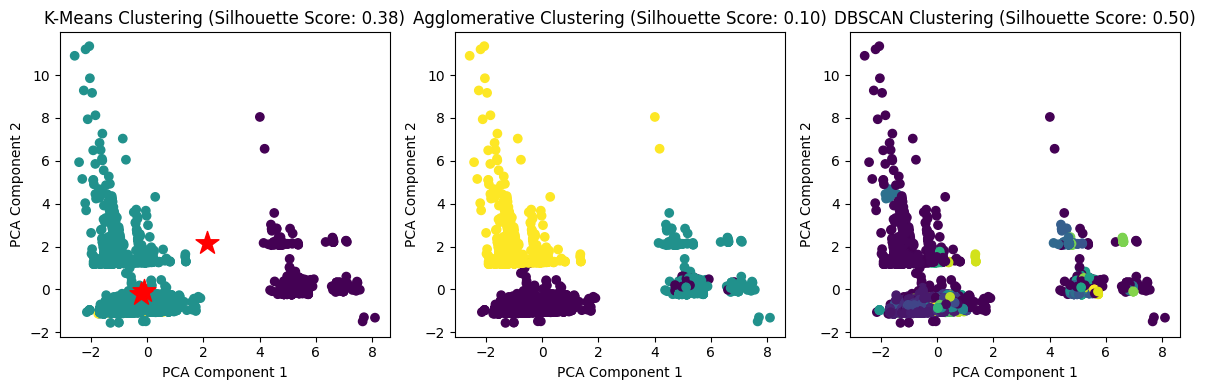

In [80]:

# Define the clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
agglo = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the clustering algorithms and get the cluster labels
kmeans_labels = kmeans.fit_predict(X_scaled)
agglo_labels = agglo.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Compute the silhouette scores for each clustering algorithm
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)

# Plot the clusters for each clustering algorithm
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', s=300, c='red')
plt.title('K-Means Clustering (Silhouette Score: {:.2f})'.format(kmeans_silhouette))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering (Silhouette Score: {:.2f})'.format(agglo_silhouette))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering (Silhouette Score: {:.2f})'.format(dbscan_silhouette))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()